This notebook gives a conversion of code from R to Python. The R code is taken from the Case Study A in the book Market Segementation Analysis by Sarah Dolnicar, Bettina Grün and Friedrich Leisch.


The book can be found [link text](https://drive.google.com/file/d/1SIEt4Bp_4R9dcs4saU1DIui1IKWQIW38/view)

In [2]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=d1e1cedc449aa8ab5074be25589a6db3c6c25da75f5cb812574dfda5da29c94c
  Stored in directory: /root/.cache/pip/wheels/c9/ab/ed/8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
Successfully built bioinfokit


# Library Section

In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
from bioinfokit.visuz import cluster
import seaborn as sns
import matplotlib.pyplot as plt
#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [4]:
mcd = pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

In [5]:
mcd.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
mcd.shape

(1453, 15)

In [7]:
mcd.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


MD.x <- as.matrix(mcdonalds[, 1:11])

R> MD.x <- (MD.x == "Yes") + 0

R> round(colMeans(MD.x), 2)
yummy convenient spicy fattening greasy
0.55 0.91 0.09 0.87 0.53
fast cheap tasty expensive healthy
0.90 0.60 0.64 0.36 0.20
disgusting
0.24

In [8]:
#converting all the boolean values to 1 and 0
md = (mcd=="Yes")+0 #converting the True as 1 and False 0
md

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0
1449,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0


In [9]:
round(np.mean(md),2)

yummy             0.55
convenient        0.91
spicy             0.09
fattening         0.87
greasy            0.53
fast              0.90
cheap             0.60
tasty             0.64
expensive         0.36
healthy           0.20
disgusting        0.24
Like              0.00
Age               0.00
VisitFrequency    0.00
Gender            0.00
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

The explained variance ratio tells us the proportion of the total variance in the data that is explained by each principal component.


# PCA

In [10]:
pca = PCA()
principalComponents = pca.fit_transform(md)

# Create a dataframe to store the results
df_pca = pd.DataFrame(data = principalComponents)


In [11]:
new_df = pd.DataFrame()

In [12]:
new_df["Stand_Dev"]=df_pca.describe().T["std"]

In [13]:
new_df["Stand_Dev"]=df_pca.describe().T["std"]

In [14]:
var_list = []
var_den = 0

for i in range(0,11):
    var_den += new_df["Stand_Dev"][i]**2

for i in range(0, len(new_df["Stand_Dev"])):
    var = (new_df["Stand_Dev"][i]**2) / var_den
    var_list.append(var)

In [15]:
new_df["Proportion of Variance"] = var_list
new_df.rename(columns={0: 'Standard Deviation'}, inplace=True)

In [16]:
new_df = new_df[:11]

In [17]:
cumuvar = []
cumuvar.append(new_df['Proportion of Variance'][0])

for i in range(1,11):
    cumuvar.append(cumuvar[i-1] + new_df['Proportion of Variance'][i])
    
new_df["Cumulative Proportion"] = cumuvar
new_df

,Stand_Dev,Proportion of Variance,Cumulative Proportion
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


The analysis of principal components reveals that the first two components are able to capture approximately 50% of the information present in the segmentation variables. Factor loadings provide an insight into how the original variables are combined to form these principal components. For instance, in the given example, the principal component 2 is majorly influenced by CHEAP and EXPENSIVE, with the highest loadings in absolute terms, indicating that it mainly represents the price dimension. By projecting the data into the principal component space with predict, the grey consumers are rotated and projected into the first two principal components. The factor loadings can be obtained by executing the relevant command.

Printing all the pca parameter for better analysis

In [18]:
print("Components:",pca.components_)
print()
print("Explained Variance:", pca.explained_variance_)
print()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print()
print("Singular Values:", pca.singular_values_)
print()
print("Mean:", pca.mean_)
print()
print("Component:", pca.n_components_)
print()
print("Features:", pca.n_features_)
print()
print("Samples:", pca.n_samples_)
print()
print("Noise Variance:", pca.noise_variance_)
print()
print("Features In:", pca.n_features_in_)
print()
print("Feature Names:", pca.feature_names_in_)

Components: [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293 -0.
  -0.         -0.         -0.        ]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633 -0.
  -0.         -0.         -0.        ]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138 -0.
  -0.         -0.         -0.        ]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871 -0.
  -0.         -0.         -0.        ]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859 -0.
  -0.         -0.         -0.        ]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.076

I am trying to replace the column names for comparing the pca components

In [19]:
data = pd.DataFrame(pca.components_,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15"])

In [20]:
data["index"] = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty', 'expensive','healthy','disgusting','Like','Age','VisitFrequency','Gender']

In [21]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,index
0,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753,-0.0,-0.0,-0.0,-0.0,yummy
1,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656,-0.0,-0.0,-0.0,-0.0,convenient
2,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571,-0.0,-0.0,-0.0,-0.0,spicy
3,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539,-0.0,-0.0,-0.0,-0.0,fattening
4,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209,-0.0,-0.0,-0.0,-0.0,greasy
5,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878,0.0,0.0,0.0,0.0,fast
6,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792,0.0,0.0,0.0,0.0,cheap
7,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181,0.0,0.0,0.0,0.0,tasty
8,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483,-0.0,-0.0,-0.0,-0.0,expensive
9,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592,-0.0,-0.0,-0.0,-0.0,healthy


In [22]:
data = data.set_index("index")

The loadings indicate how the original variables are combined to form principal
components. Loadings guide the interpretation of principal components. In our
example, the two segmentation variables with the highest loadings (in absolute
terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this
principal component captures the price dimension. We project the data into the
principal component space with predict. The following commands rotate and
project consumers (in grey) into the first two principal components, plot them and
add the rotated and projected original segmentation variables as arrows:

R> library("flexclust")

R> plot(predict(MD.pca), col = "grey")

R> projAxes(MD.pca)

Taking the data values and excluding the categorical columns

In [23]:
x = pd.DataFrame(data.values).iloc[:11,:11]

In [24]:
x.columns = data.columns[:11]

Printing the plot with comparing of the two pca's with the labels

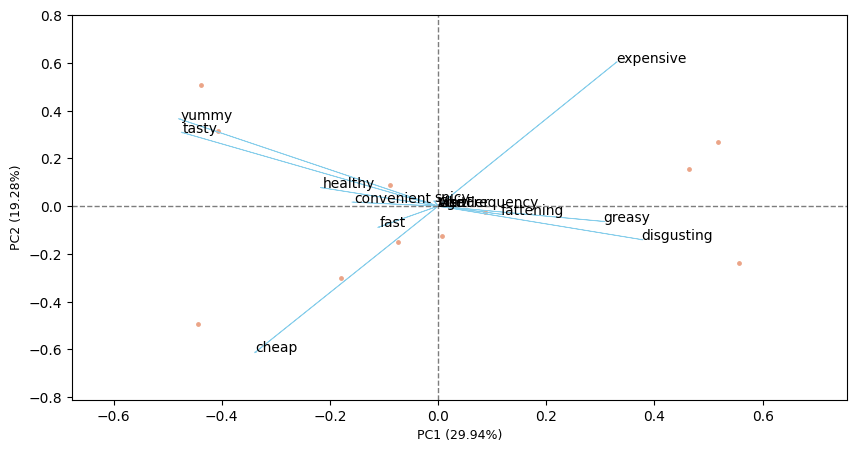

In [25]:
pca_scores = PCA().fit_transform(x)
loadings = pca.components_
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.index.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## we extract segments. To illustrate a range of extraction techniques

We calculate solutions for two to eight market segments using standard k-means
analysis with ten random restarts (argument nrep). We then relabel segment
numbers such that they are consistent across segmentations.

In [26]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from sklearn.cluster import KMeans

Printing the kmeans labels

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(md)
md['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316 0.
  0.         0.         0.        ]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345 0.
  0.         0.         0.        ]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789 0.
  0.         0.         0.        ]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715 0.
  0.         0.         0.        ]]


In [31]:
len(kmeans.labels_)

1453

In [32]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [131]:
# Cluster Visualization

In [33]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
index,,,,,,,,,,,,,,,
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753,-0.0,-0.0,-0.0,-0.0
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656,-0.0,-0.0,-0.0,-0.0
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571,-0.0,-0.0,-0.0,-0.0
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539,-0.0,-0.0,-0.0,-0.0
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209,-0.0,-0.0,-0.0,-0.0
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878,0.0,0.0,0.0,0.0
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792,0.0,0.0,0.0,0.0
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181,0.0,0.0,0.0,0.0
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483,-0.0,-0.0,-0.0,-0.0


In [34]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(md)

pca = PCA(n_components=11)
pc = pca.fit_transform(md)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.875089,-0.061403,0.491141,-0.494438,0.235338,0.114829,-0.382505,-0.263953,0.152695,0.212540,0.493273
1,-1.376189,0.459888,-0.630834,-0.047976,0.040141,0.013406,-0.084369,-0.136512,-0.042084,0.138490,0.473505
2,-1.102485,1.020259,-0.061388,0.590672,0.984259,0.585077,-0.617939,0.375676,0.361582,-0.311590,0.056613
3,-0.343729,-0.207619,-0.883455,0.263013,-0.674981,0.107584,-0.033110,-0.053890,-0.233420,-0.023984,-0.254075
4,0.859940,-0.576516,-0.220604,0.458622,0.896037,-0.020397,-0.102202,-0.503737,0.154115,-0.043393,0.020097
...,...,...,...,...,...,...,...,...,...,...,...
1448,2.091459,0.934048,0.002285,0.225516,-0.173120,-0.141572,0.291321,-0.038267,0.347020,-0.151705,-0.430888
1449,-0.703962,-0.626779,0.444883,0.473980,-0.156555,-0.151073,0.362338,-0.329148,0.868593,-0.306591,-0.245753
1450,-1.435762,0.842306,0.461274,-0.443016,-0.202972,0.002923,-0.194367,-0.098924,-0.040320,0.048822,0.050161
1451,-0.774174,-0.850903,0.705194,0.701022,0.053489,-0.039746,0.188642,-0.000724,-0.338166,0.022204,-0.002456


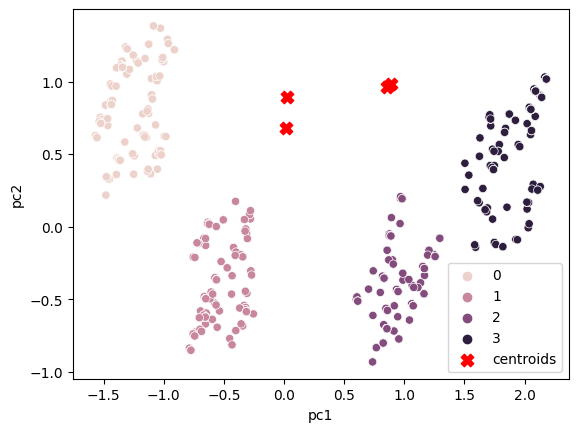

In [35]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [36]:
#Proportion of Variance (from PC1 to PC11)
pd.Series(pca.explained_variance_ratio_)

0     0.472427
1     0.152484
2     0.093564
3     0.055510
4     0.039227
5     0.035500
6     0.032976
7     0.027937
8     0.025939
9     0.024059
10    0.021199
dtype: float64

# DESCRIBING SEGMENTS

In [39]:

crosstab_gender =pd.crosstab(md['cluster_num'],mcd['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


<Axes: xlabel='cluster_num', ylabel='Age'>

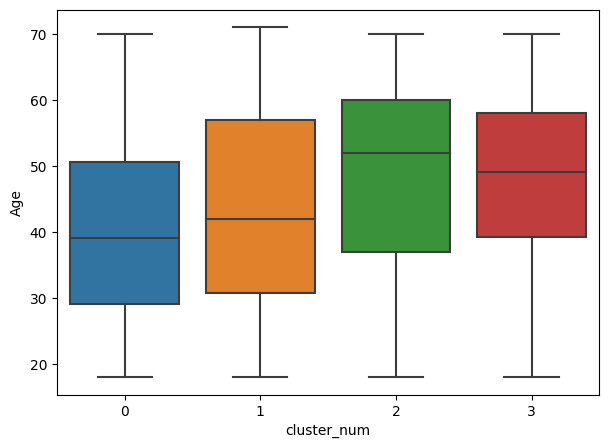

In [41]:
sns.boxplot(x=md["cluster_num"], y=mcd["Age"])

In [43]:
# Selecting target segment
#Calculating the mean
#Visit frequency
md['VisitFrequency'] = LabelEncoder().fit_transform(mcd['VisitFrequency'])
visit_freq = md.groupby('cluster_num')['VisitFrequency'].mean()
visit_freq = visit_freq.to_frame().reset_index()
visit_freq


,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


## Extracting segments

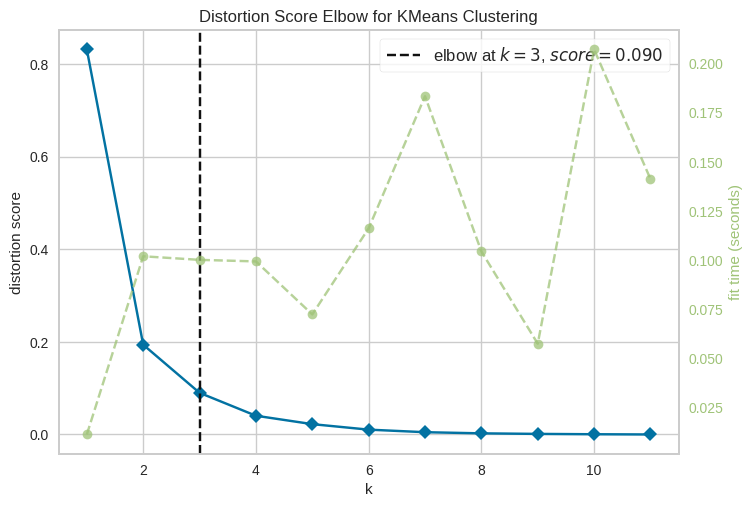

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(new_df)
visualizer.show()

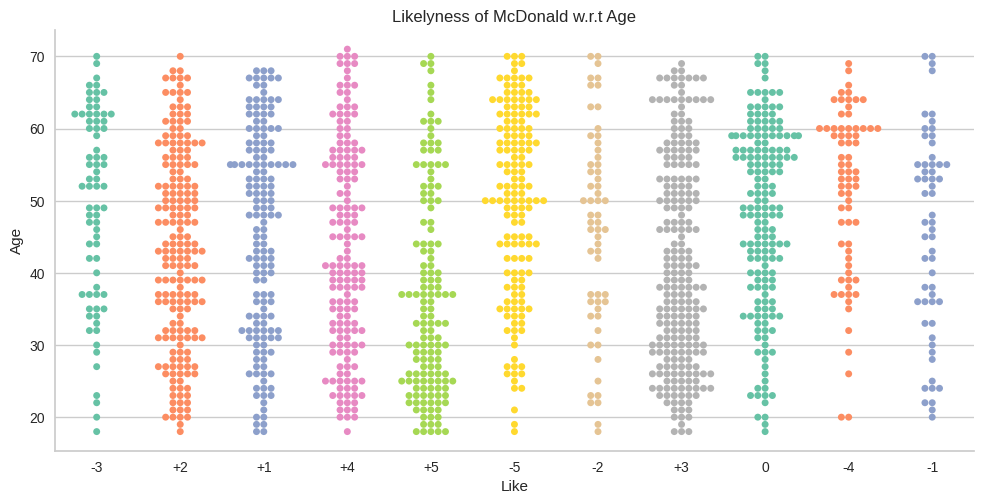

In [45]:
# count Rating with respect to age
mcd['Like']= mcd['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=mcd, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [46]:
md['Like'] = mcd['Like'].astype('int')

In [47]:
md['Like'] = LabelEncoder().fit_transform(md['Like'])
Like = md.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.139319
1,1,7.665517
2,2,3.486842
3,3,2.365854


In [48]:
#Gender
md['Gender'] = LabelEncoder().fit_transform(mcd['Gender'])
Gender = md.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
round(Gender,3)

,cluster_num,Gender
0,0,0.523
1,1,0.398
2,2,0.411
3,3,0.569


In [49]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit_freq, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,7.139319,2.547988
1,1,0.398276,7.665517,2.584483
2,2,0.411184,3.486842,2.822368
3,3,0.569106,2.365854,2.654472


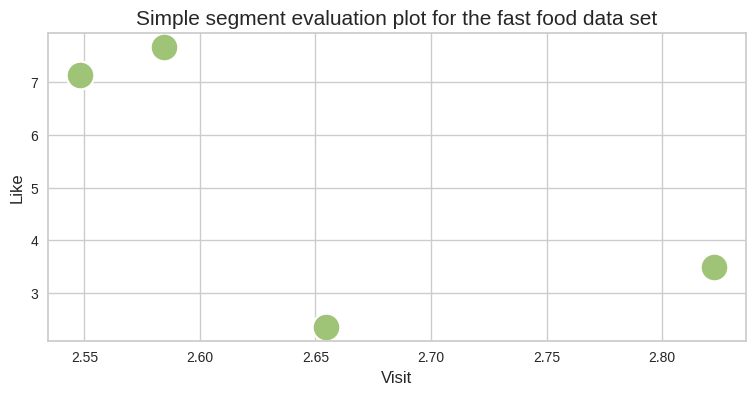

In [50]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="g")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()